### Домашнее задание
Сделайте краткий обзор научной работы, посвящённой алгоритму нейронных сетей, не рассматриваемому ранее на курсе. Проведите анализ: чем отличается выбранная архитектура от других? В чём плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при её применении на практике?

### M2Det: Детектор объектов на одном снимке, основанный на многоуровневой сети пирамид признаков

Ссылка на статью: https://qijiezhao.github.io/imgs/m2det.pdf


В данной работе предствлена многоуровневая сеть пирамид признаков (Multi-Level Feature Pyramid Network - MLFPN) для построения более эффективных пирамид признаков для обнаружения объектов разного масштаба.

### Особенности
M2Det использует опорную сеть и многоуровневую сеть пирамид признаков (MLFPN) для извлечения признаков из входного изображения, а затем, подобно SSD, создает плотные ограничительные рамки и оценки категорий на основе изученных признаков, после чего для получения окончательных результатов используется операция не максимального подавления (NMS). MLFPN состоит из трех моделей: модель слияния признаков (FFM), разреженная модуль U-образной формы (TUM) и модель агрегации признаков с учетом масштаба (SFAM).


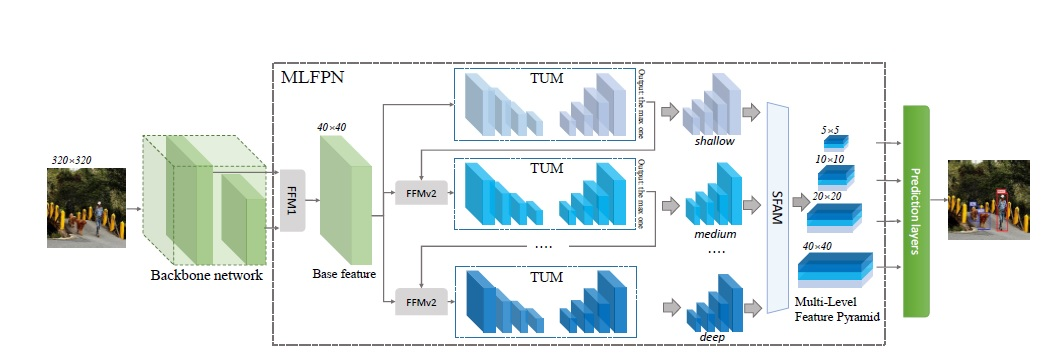

**FFM** объединяют признаки с разных уровней в M2Det, которые имеют решающее значение для построения конечной многоуровневой пирамиды признаков. Они используют слои свертки 1x1 для сжатия каналов входных признаков и используют операцию конкатенации для объединения этих карт признаков. В частности, поскольку FFMv1 берет на вход две карты признаков с разными масштабами, она использует одну операцию upsample для приведения глубоких признаков к одному масштабу перед операцией конкатенации. В то же время FFMv2 берет на вход базовый признак и самую большую выходную карту признаков предыдущего TUM - эти два признака имеют одинаковый масштаб - и производит объединенный признак для следующего TUM.

В отличие от FPN и RetinaNet, в **TUM** используется более тонкая U-образная структура. Кодер представляет собой серию сверточных слоев 3x3 с шагом 2. Декодер берет выходы этих слоев в качестве опорного набора карт признаков, в то время как оригинальная FPN выбирает выход последнего слоя каждого этапа в ResNet-магистрали. Добавлены слои свертки 1x1 после операции upsample и элементарной суммы на ветви декодера, чтобы повысить обучаемость и сохранить гладкость признаков. Все выходы в декодере каждого TUM формируют мультимасштабные характеристики текущего уровня. В целом, выходы сложенных TUM формируют многоуровневые разномасштабные признаки, при этом передний ТУМ обеспечивает в основном признаки мелкого уровня, средний TUM - среднего уровня, а задний TUM - глубокого уровня.

Целью **SFAM** является объединение многоуровневых разномасштабных признаков, генерируемых TUMs, в многоуровневую пирамиду признаков. На первом этапе SFAM объединяются признаки эквивалентного масштаба вдоль измерения канала. 
При этом каждый масштаб в агрегированной пирамиде содержит признаки с многоуровневой глубины. Однако простые операции конкатенации недостаточно адаптивны. На втором этапе вводится модуль внимания по каналам, чтобы побудить признаки сосредоточиться на каналах, которые приносят им наибольшую пользу.

Повышение точности обнаружения **M2Det** достигается в основном за счет предложенного MLFPN. Объединяя многоуровневые признаки, извлеченные единым целым, в качестве базового признака, а затем подавая их в блок чередующихся совместных моделей Thinned U-shape Modules и Feature Fusion Modules для извлечения многоуровневых многомасштабных признаков. Глубина слоев-декодеров позволяет выполнять обнаружение объектов в высокой точностью.